In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os
import pickle

import matplotlib.pyplot as plt
import seaborn as sb
color = sb.color_palette()
%matplotlib inline

from sklearn import preprocessing as pp 
from scipy.stats import pearsonr


In [2]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

In [300]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import pearsonr 
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV

from scipy.stats import wilcoxon

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [76]:
from dplython import (DplyFrame, X, diamonds, select, sift, sample_n,
    sample_frac, head, arrange, mutate, group_by, summarize, DelayFunction) 

In [20]:
current_path = os.getcwd()
print(current_path)

/Users/Ulkar/Google Drive/DATA SCIENCE/Insight Project/Code


In [25]:
df= pd.read_csv("/Users/Ulkar/Google Drive/DATA SCIENCE/Insight Project/Code/Febr2020o.csv", low_memory=False)
df.head(5)
df.shape


(10701, 87)

In [34]:
dfmaster= pd.read_csv("/Users/Ulkar/Google Drive/DATA SCIENCE/Insight Project/Code/MasterData_new.csv", low_memory=False)
dfmaster.shape

(33933, 36)

In [35]:
# Add employee level variables (master data)
df_merged=pd.merge(df, dfmaster, how='left',  left_on="survey_code", right_on="Feb2020SurveyCode")

In [36]:
# 
df_merged.shape

(10701, 123)

In [32]:
df_merged.head(10)

,survey_code,submitted,ti_1,ti_2,ti_3,ti_4,ti_5,ti_6,ti_7,ti_8,...,JobTitle,Department,DepartmentBenchmark,DepartmentCode,DepartmentName_y,Disabilities,Aug2018RespondentID,Feb2019SurveyCode,Fall(Aug)2019SurveyCode,Feb2020SurveyCode
0,bogle100101,True,5,5,4,4,4,4,4,3,...,Area Recruiter - Home Office,NaN,"Activities, Enrichment, Connections",505.0,Other,Prefer not to answer,613062.0,Bogle100101,Bogle100101,bogle100101
1,shireman46870,True,4,5,3,5,4,4,3,3,...,AP Spec - Supplier & Expense,NaN,No Response,NaN,Pharmacy Tech,"Yes, I have a disability",698318.0,Shireman46870,Shireman46870,shireman46870
2,gregorowicz124995,True,4,5,5,4,4,5,5,3,...,PCA Executive Director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gregorowicz124995,gregorowicz124995
3,gest30170,True,5,5,5,5,5,5,5,5,...,AP/Payroll Coordinator,58-Fac Admin,"Activities, Enrichment, Connections",505.0,Other,Prefer not to answer,614532.0,Gest30170,Gest30170,gest30170
4,crowel125796,True,5,5,5,5,5,5,5,5,...,SVP-Operations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crowel125796,crowel125796
5,canale123172,True,5,5,5,5,5,4,4,4,...,Division Business Development,NaN,NaN,NaN,NaN,NaN,NaN,Canale123172,Canale123172,canale123172
6,jones4159,True,5,5,5,4,4,4,4,5,...,AP/Payroll Coordinator,58-Fac Admin,NaN,NaN,NaN,NaN,594226.0,Jones4159,Jones4159,jones4159
7,harrell100886,True,3,3,3,3,2,3,2,4,...,CRMA-Preceptor,31-Nurse AL,No Response,NaN,Other,"No, I do not have a disability",680854.0,Harrell100886,Harrell100886,harrell100886
8,stuber50346,True,5,5,4,5,5,5,5,5,...,AVP-Foundation & Workforce Dev,NaN,"Accounting including A/P, A/R",1100.0,Home Office,"No, I do not have a disability",596334.0,Stuber50346,Stuber50346,stuber50346
9,wilson127343,True,5,5,5,5,5,4,4,5,...,Customer Service Specialist,52-Admissions,NaN,NaN,NaN,NaN,NaN,NaN,Wilson127343,wilson127343


In [37]:
list(df_merged.columns)

['survey_code',
 'submitted',
 'ti_1',
 'ti_2',
 'ti_3',
 'ti_4',
 'ti_5',
 'ti_6',
 'ti_7',
 'ti_8',
 'ti_9',
 'ti_10',
 'ti_11',
 'ti_12',
 'ti_13',
 'ti_14',
 'ti_15',
 'ti_16',
 'ti_17',
 'ti_18',
 'ti_19',
 'ti_20',
 'ti_21',
 'ti_22',
 'ti_23',
 'ti_24',
 'ti_25',
 'ti_26',
 'ti_27',
 'ti_28',
 'ti_29',
 'ti_30',
 'ti_31',
 'ti_32',
 'ti_33',
 'ti_34',
 'ti_35',
 'ti_36',
 'ti_37',
 'ti_38',
 'ti_39',
 'ti_40',
 'ti_41',
 'ti_42',
 'ti_43',
 'ti_44',
 'ti_45',
 'ti_46',
 'ti_47',
 'ti_48',
 'ti_49',
 'ti_50',
 'ti_51',
 'ti_52',
 'ti_53',
 'ti_54',
 'ti_55',
 'ti_56',
 'ti_57',
 'ti_58',
 'ti_59',
 'ti_60',
 'overall_positive',
 'overall_inconsistent',
 'overall_negative',
 'TI 1+',
 'TI 4',
 'TI 5',
 'TI all',
 'TI score',
 'Tenure',
 'Work Status',
 'Pay Type',
 'Female',
 'Race',
 'Hire Date',
 'HireDays',
 'Managerial Level',
 'Confidence in Executive Team_x',
 'Meaningful Innovation Opportunities',
 'Postal/Zip Code',
 'Location Name',
 'Date of Birth',
 'Department Code',
 

In [104]:
# Add manager level variables (manager data)
dfmng= pd.read_csv("/Users/Ulkar/Google Drive/DATA SCIENCE/Insight Project/Code/manager.csv", low_memory=False)
dfmng.head(10)

,ManagerID,Location Name_m,Race_m,Age_m,Female_m,Status_m,Pay type_m,Work Status_m,Work Status_m.1,CurrentPay_m,Work Zip_m,Home Zip_m,THSHireDate_m,JobStartDate_m,manager_tenure_month,term_by_feb2020,TerminationDate_m,TerminationReason_m,DepartmentCode_m,DepartmentName_m
0,105489.0,Autumn Woods Health Campus - 105,NaN,35.0,1.0,T,H,F,R,12.02,47150-4316,47150,5/24/16,9/19/17,36,0.0,1/1/18,NaN,NaN,NaN
1,112313.0,Autumn Woods Health Campus - 105,NaN,32.0,1.0,T,H,F,R,12.68,47150-4316,47150,5/23/17,5/23/17,40,0.0,1/1/18,NaN,NaN,NaN
2,113617.0,Autumn Woods Health Campus - 105,NaN,40.0,1.0,T,H,F,R,10,47150-4316,47150,7/25/17,7/25/17,37,0.0,1/1/18,NaN,NaN,NaN
3,113493.0,Autumn Woods Health Campus - 105,NaN,42.0,1.0,T,H,F,R,14.33,47150-4316,47161,7/18/17,7/18/17,38,0.0,1/1/18,NaN,NaN,NaN
4,41470.0,Bethany Pointe Health Campus-Paragon - 1112,White,29.0,1.0,A,H,P,T,30,NaN,46060,2/13/14,9/19/18,24,0.0,1/1/18,NaN,NaN,NaN
5,47970.0,Cypress Pointe Health Campus - 416,NaN,29.0,0.0,T,H,F,R,12.14,45322,45406,2/10/15,5/1/16,52,0.0,1/1/18,NaN,NaN,NaN
6,23538.0,Forest Glen Health Campus-Paragon - 1401,NaN,65.0,1.0,T,H,F,R,12.33,NaN,45505,10/14/10,12/13/10,117,0.0,1/1/18,NaN,NaN,NaN
7,31106.0,Forest Park Health Campus - 123,NaN,37.0,1.0,T,H,F,R,11,47374-7439,47339,3/16/12,3/16/12,102,0.0,1/1/18,NaN,NaN,NaN
8,41168.0,Franciscan Healthcare Center - 137,NaN,58.0,1.0,T,H,F,R,11.45,40219,40228,12/3/13,9/27/17,35,0.0,1/1/18,NaN,NaN,NaN
9,112349.0,Glen Ridge Health Campus - 126,NaN,35.0,1.0,T,H,P,R,12.59,40299-3250,40299,6/20/17,6/20/17,39,0.0,1/1/18,NaN,NaN,NaN


In [58]:
dfmng['ManagerID'].dtypes

dtype('float64')

In [ ]:
round(dfmng['ManagerID'])

In [78]:
df_all=pd.merge(df_merged, dfmng, how='left',  left_on="ManagerID", right_on="ManagerID")
df_all.head(10)

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,survey_code,submitted,ti_1,ti_2,ti_3,ti_4,ti_5,ti_6,ti_7,ti_8,...,Work Zip_m,Home Zip_m,THSHireDate_m,JobStartDate_m,manager_tenure_month,term_by_feb2020,TerminationDate_m,TerminationReason_m,DepartmentCode_m,DepartmentName_m
0,bogle100101,True,5,5,4,4,4,4,4,3,...,40222,40202,10/17/11,1/1/17,44.0,NaN,NaN,NaN,128,Caregiver
1,shireman46870,True,4,5,3,5,4,4,3,3,...,40222,40243,8/8/16,3/23/20,6.0,NaN,NaN,NaN,1100,Home Office
2,gregorowicz124995,True,4,5,5,4,4,5,5,3,...,40299,43065,4/12/10,4/12/10,125.0,NaN,NaN,NaN,512,Nursing
3,gest30170,True,5,5,5,5,5,5,5,5,...,45504,45503,12/11/17,12/11/17,33.0,NaN,NaN,NaN,No Response,Other
4,crowel125796,True,5,5,5,5,5,5,5,5,...,40222,40059,1/5/16,10/1/19,11.0,NaN,NaN,NaN,NaN,NaN
5,canale123172,True,5,5,5,5,5,4,4,4,...,40222,40222,2/22/05,1/1/18,32.0,NaN,NaN,NaN,No Response,Pharmacy Tech
6,jones4159,True,5,5,5,4,4,4,4,5,...,46012-9669,46011,2/24/11,8/8/17,37.0,NaN,NaN,NaN,NaN,NaN
7,harrell100886,True,3,3,3,3,2,3,2,4,...,46356,46356,9/9/14,9/23/16,48.0,NaN,NaN,NaN,128,Caregiver
8,stuber50346,True,5,5,4,5,5,5,5,5,...,40222,40223,3/28/11,7/24/20,2.0,NaN,NaN,NaN,NaN,NaN
9,wilson127343,True,5,5,5,5,5,4,4,5,...,40330,40356,9/17/18,1/27/19,19.0,NaN,NaN,NaN,NaN,NaN


In [66]:
df_all.shape

(11967, 142)

In [67]:
list(df_all.columns)

['survey_code',
 'submitted',
 'ti_1',
 'ti_2',
 'ti_3',
 'ti_4',
 'ti_5',
 'ti_6',
 'ti_7',
 'ti_8',
 'ti_9',
 'ti_10',
 'ti_11',
 'ti_12',
 'ti_13',
 'ti_14',
 'ti_15',
 'ti_16',
 'ti_17',
 'ti_18',
 'ti_19',
 'ti_20',
 'ti_21',
 'ti_22',
 'ti_23',
 'ti_24',
 'ti_25',
 'ti_26',
 'ti_27',
 'ti_28',
 'ti_29',
 'ti_30',
 'ti_31',
 'ti_32',
 'ti_33',
 'ti_34',
 'ti_35',
 'ti_36',
 'ti_37',
 'ti_38',
 'ti_39',
 'ti_40',
 'ti_41',
 'ti_42',
 'ti_43',
 'ti_44',
 'ti_45',
 'ti_46',
 'ti_47',
 'ti_48',
 'ti_49',
 'ti_50',
 'ti_51',
 'ti_52',
 'ti_53',
 'ti_54',
 'ti_55',
 'ti_56',
 'ti_57',
 'ti_58',
 'ti_59',
 'ti_60',
 'overall_positive',
 'overall_inconsistent',
 'overall_negative',
 'TI 1+',
 'TI 4',
 'TI 5',
 'TI all',
 'TI score',
 'Tenure',
 'Work Status',
 'Pay Type',
 'Female',
 'Race',
 'Hire Date',
 'HireDays',
 'Managerial Level',
 'Confidence in Executive Team_x',
 'Meaningful Innovation Opportunities',
 'Postal/Zip Code',
 'Location Name',
 'Date of Birth',
 'Department Code',
 

In [119]:
df_all['CurrentPay_m']=(pd.to_numeric(df_all['CurrentPay_m'], errors='coerce'))
df_all['CurrentPay_master']=(pd.to_numeric(df_all['CurrentPay_master'], errors='coerce'))
df_all['CurrentPay_m'].fillna(df_all['CurrentPay_m'].mean(), inplace=True)
df_all['CurrentPay_master'].fillna(df_all['CurrentPay_master'].mean(), inplace=True)

In [120]:
df_all['CurrentPay_m_logged']=np.log(df_all['CurrentPay_m'])
df_all['CurrentPay_master_logged']=np.log(df_all['CurrentPay_master'])

In [121]:
df_all['Age_m']=(pd.to_numeric(df_all['Age_m'], errors='coerce'))
df_all['manager_tenure_month']=(pd.to_numeric(df_all['manager_tenure_month'], errors='coerce'))
df_all['Age_m'].fillna(df_all['Age_m'].mean(), inplace=True)
df_all['manager_tenure_month'].fillna(df_all['manager_tenure_month'].mean(), inplace=True)

In [79]:
df_all['Female_m'].isnull().sum()

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3066

In [122]:
df_all2['Race_m'].isnull().sum()

0

In [123]:
# Dropped Female missing columns
df_all2 = df_all[pd.notnull(df_all['Female_m'])]
df_all2 = df_all2[pd.notnull(df_all2['Race_m'])]

In [124]:
count_mng=df_all2.groupby(['ManagerID']).count()

In [125]:
count_mng=count_mng[count_mng["survey_code"]>=5]
count_mng['ManagerID'] = count_mng.index

In [126]:
df_all3=df_all2[df_all2['ManagerID'].isin(count_mng['ManagerID'])]
df_all3.head(10)

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,survey_code,submitted,ti_1,ti_2,ti_3,ti_4,ti_5,ti_6,ti_7,ti_8,...,THSHireDate_m,JobStartDate_m,manager_tenure_month,term_by_feb2020,TerminationDate_m,TerminationReason_m,DepartmentCode_m,DepartmentName_m,CurrentPay_m_logged,CurrentPay_master_logged
0,bogle100101,True,5,5,4,4,4,4,4,3,...,10/17/11,1/1/17,44.0,NaN,NaN,NaN,128,Caregiver,3.686044,3.040123
1,shireman46870,True,4,5,3,5,4,4,3,3,...,8/8/16,3/23/20,6.0,NaN,NaN,NaN,1100,Home Office,3.686044,3.040123
2,gregorowicz124995,True,4,5,5,4,4,5,5,3,...,4/12/10,4/12/10,125.0,NaN,NaN,NaN,512,Nursing,3.686044,4.340684
4,crowel125796,True,5,5,5,5,5,5,5,5,...,1/5/16,10/1/19,11.0,NaN,NaN,NaN,NaN,NaN,3.686044,3.040123
5,canale123172,True,5,5,5,5,5,4,4,4,...,2/22/05,1/1/18,32.0,NaN,NaN,NaN,No Response,Pharmacy Tech,3.686044,3.040123
7,harrell100886,True,3,3,3,3,2,3,2,4,...,9/9/14,9/23/16,48.0,NaN,NaN,NaN,128,Caregiver,3.826683,2.802148
8,stuber50346,True,5,5,4,5,5,5,5,5,...,3/28/11,7/24/20,2.0,NaN,NaN,NaN,NaN,NaN,3.686044,3.040123
10,jackson119765,True,3,4,3,4,4,3,3,4,...,1/23/17,7/7/19,14.0,NaN,NaN,NaN,111,Other,4.554193,3.054473
12,radford116305,True,5,5,5,5,5,5,4,3,...,12/11/17,4/16/18,29.0,NaN,NaN,NaN,512,Dietary,4.144087,2.880882
13,giordanengo115211,True,5,5,5,5,5,5,5,5,...,9/25/17,9/25/17,35.0,NaN,NaN,NaN,128,Caregiver,3.370051,2.947592


In [127]:
x_quest=df_all3.iloc[:, 2:62]
x_quest

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ti_1,ti_2,ti_3,ti_4,ti_5,ti_6,ti_7,ti_8,ti_9,ti_10,...,ti_51,ti_52,ti_53,ti_54,ti_55,ti_56,ti_57,ti_58,ti_59,ti_60
0,5,5,4,4,4,4,4,3,5,3,...,4,4,4,5,5,5,5,4,4,5
1,4,5,3,5,4,4,3,3,2,3,...,4,4,4,2,4,4,5,2,3,5
2,4,5,5,4,4,5,5,3,5,4,...,5,4,5,5,5,5,5,5,5,5
4,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
5,5,5,5,5,5,4,4,4,4,4,...,5,5,4,4,5,4,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11959,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
11960,5,5,5,5,5,5,4,5,5,4,...,5,5,5,5,4,5,5,5,5,5
11964,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
11965,4,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [128]:
## Getting Demographic features
mng_demog=df_all3[['Race_m', 'Age_m', 'Female_m', 'manager_tenure_month',  'term_by_feb2020', "CurrentPay_m"]]

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [129]:
mng_demog.isnull().sum()

Race_m                     0
Age_m                      0
Female_m                   0
manager_tenure_month       0
term_by_feb2020         7470
CurrentPay_m               0
dtype: int64

In [133]:
x_man_quest=df_all3[["ti_6", "ti_7", "ti_9", "ti_13", "ti_14", "ti_15", "ti_18", "ti_19", "ti_20", "ti_21", "ti_22", "ti_24", "ti_31",
                    "ti_34", "ti_39", "ti_43", "ti_46", "ti_47", "ti_54"]]


In [175]:
y_quest=df_all3[["ti_1", "ti_2", "ti_3", "ti_4", "ti_5", "ti_8", "ti_10", "ti_11", "ti_12", "ti_16", "ti_17", "ti_23",
                    "ti_25", "ti_26", "ti_27", "ti_28", "ti_29", "ti_30", "ti_32", "ti_33", "ti_35", "ti_36", "ti_37", "ti_38",
                "ti_40", "ti_41", "ti_42", "ti_44", "ti_45", "ti_48", "ti_49", "ti_50", "ti_51", "ti_52", "ti_53", "ti_55", "ti_56", 
                "ti_57", "ti_58", "ti_59", "ti_60"]]

### FACTOR ANALYSIS

In [135]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [136]:
## Factor Adequcy test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(x_man_quest)
chi_square_value, p_value

(151238.79959742102, 0.0)

In [ ]:
# The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

In [140]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(x_man_quest)
kmo_model
#0.98  This value indicates that you can proceed with your planned factor analysis.

0.9873552319936093

In [163]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation=None, n_factors=19)

In [165]:
fa.fit(x_man_quest)

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/factor_analyzer/factor_analyzer.py:342: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  error = sp.sum(residual)


FactorAnalyzer(n_factors=19, rotation=None, rotation_kwargs={})

In [160]:
fa.loadings_

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[ 0.82797344, -0.10019762],
       [ 0.83818727, -0.15058849],
       [ 0.83231922, -0.11567072],
       [ 0.84019397, -0.10439163],
       [ 0.83459094, -0.03651875],
       [ 0.86890728, -0.11894091],
       [ 0.81566296, -0.05249452],
       [ 0.84913068,  0.01917628],
       [ 0.74358917,  0.02396644],
       [ 0.84699317, -0.06219561],
       [ 0.81670588, -0.06608823],
       [ 0.84999071, -0.0013931 ],
       [ 0.87826969,  0.01581659],
       [ 0.88212124,  0.02582603],
       [ 0.65025383,  0.19649868],
       [ 0.83488765,  0.186044  ],
       [ 0.83146533,  0.23968108],
       [ 0.84205259,  0.08150947],
       [ 0.78671466,  0.07099181]])

In [161]:
fa.get_communalities()

array([0.69557958, 0.7252348 , 0.706135  , 0.71682351, 0.69787566,
       0.76914681, 0.66806175, 0.72139065, 0.55349925, 0.72126573,
       0.67137614, 0.72248614, 0.77160781, 0.77880486, 0.46144177,
       0.73164976, 0.74878161, 0.71569637, 0.62395979])

In [166]:
ev, v = fa.get_eigenvalues()
ev

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([13.27019107,  0.62899184,  0.50669988,  0.42872435,  0.41563533,
        0.39774637,  0.36155137,  0.31412062,  0.31319704,  0.2791098 ,
        0.26947552,  0.26327914,  0.25098119,  0.23805855,  0.23564512,
        0.22848967,  0.21966857,  0.21219641,  0.16623817])

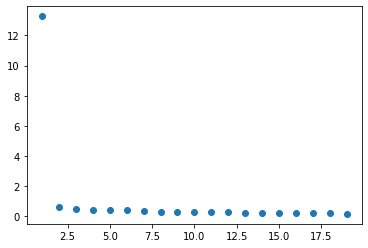

In [167]:
plt.scatter(range(1,x_man_quest.shape[1]+1),ev)

In [170]:
fa.get_factor_variance() # on factor explains 0.68 % of variance

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([12.96114042]), array([0.68216529]), array([0.68216529]))

In [169]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation=None, n_factors=1)
fa.fit(x_man_quest)

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/factor_analyzer/factor_analyzer.py:342: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  error = sp.sum(residual)


FactorAnalyzer(n_factors=1, rotation=None, rotation_kwargs={})

In [171]:
X_man_quest_transformed=fa.fit_transform(x_man_quest)

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/factor_analyzer/factor_analyzer.py:342: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  error = sp.sum(residual)


In [172]:
X_man_quest_transformed.shape

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(7941, 1)

## Factor Analysis FOR DV

Eigen values: a measure of how much of the variance of the variables does a factor explain.

In [178]:
y_quest

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ti_1,ti_2,ti_3,ti_4,ti_5,ti_8,ti_10,ti_11,ti_12,ti_16,...,ti_50,ti_51,ti_52,ti_53,ti_55,ti_56,ti_57,ti_58,ti_59,ti_60
0,5,5,4,4,4,3,3,4,5,5,...,4,4,4,4,5,5,5,4,4,5
1,4,5,3,5,4,3,3,4,5,5,...,5,4,4,4,4,4,5,2,3,5
2,4,5,5,4,4,3,4,5,5,5,...,5,5,4,5,5,5,5,5,5,5
4,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
5,5,5,5,5,5,4,4,5,4,5,...,5,5,5,4,5,4,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11959,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
11960,5,5,5,5,5,5,4,5,5,5,...,5,5,5,5,4,5,5,5,5,5
11964,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
11965,4,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [187]:
# Create factor analysis object and perform factor analysis
fa_y = FactorAnalyzer(n_factors=3, rotation='varimax')
fa_y.fit(y_quest)


/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/factor_analyzer/factor_analyzer.py:342: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  error = sp.sum(residual)


FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [188]:
ev, v = fa_y.get_eigenvalues()
ev

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([23.62169812,  1.44752641,  1.01762254,  0.88453944,  0.76743896,
        0.75867914,  0.63553097,  0.56714152,  0.5415222 ,  0.51421032,
        0.48625159,  0.47024112,  0.44579691,  0.44008785,  0.42118342,
        0.41909546,  0.4136031 ,  0.39220137,  0.38936552,  0.38387439,
        0.37091432,  0.3533436 ,  0.34353636,  0.33721878,  0.32815305,
        0.32146039,  0.31394719,  0.30754712,  0.30370458,  0.29202659,
        0.28318633,  0.27987449,  0.27547802,  0.27224775,  0.2605157 ,
        0.24031105,  0.23597849,  0.22469102,  0.22312622,  0.20865082,
        0.20647778])

In [189]:
loads = fa_y.loadings_
print(loads)

[[0.49470931 0.34829276 0.26891871]
 [0.41598928 0.3461554  0.37304319]
 [0.62895353 0.31061302 0.31631211]
 [0.72013443 0.27147512 0.24692765]
 [0.7287035  0.25948858 0.27015803]
 [0.44362321 0.36489389 0.35972455]
 [0.60843211 0.31638727 0.24169778]
 [0.26415874 0.51980032 0.34096268]
 [0.61741952 0.35812896 0.33318785]
 [0.39252551 0.53571087 0.36669575]
 [0.59984253 0.37609541 0.2137801 ]
 [0.36206573 0.48225655 0.42622208]
 [0.28223576 0.26025204 0.39127099]
 [0.65619258 0.43028512 0.27101127]
 [0.50549847 0.30536835 0.55465802]
 [0.67250559 0.31189019 0.33185943]
 [0.68068037 0.43012025 0.25689424]
 [0.4733896  0.43625222 0.43275708]
 [0.27779889 0.22996252 0.72615787]
 [0.58822996 0.33769411 0.43930485]
 [0.58892894 0.47861793 0.37211702]
 [0.28790059 0.27833322 0.72412698]
 [0.38464195 0.61298187 0.44890181]
 [0.36696181 0.46835186 0.45768098]
 [0.65166339 0.25399045 0.33881459]
 [0.59774873 0.41846176 0.265693  ]
 [0.21263013 0.31573017 0.69064978]
 [0.58846438 0.36184502 0.35

<AxesSubplot:>

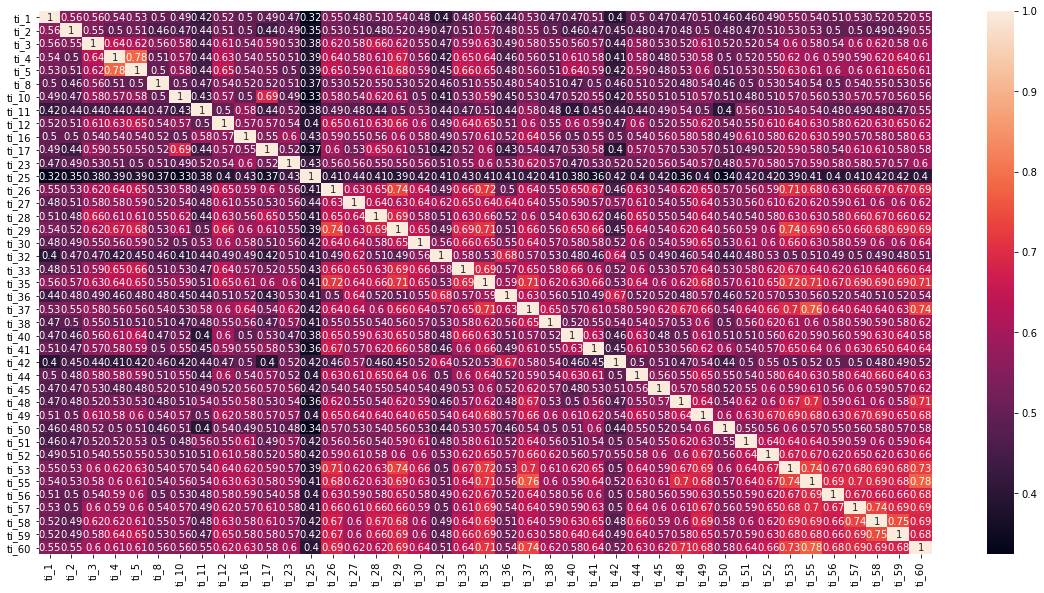

In [184]:
import seaborn as sns
plt.figure(figsize=(20,10))
c= y_quest.corr()
sns.heatmap(c, annot = True)

In [190]:
y_quest_transformed=fa_y.fit_transform(y_quest)

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/factor_analyzer/factor_analyzer.py:342: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  error = sp.sum(residual)


In [203]:
#Create the factors
factor1 = y_quest[["ti_3", "ti_4", "ti_5", "ti_10", "ti_12", "ti_26", "ti_28", "ti_29", "ti_40"]]
happiness_f = y_quest[["ti_37", "ti_48", "ti_55", "ti_60" ]]
dg_f = y_quest[["ti_32", "ti_36", "ti_42"]]

happiness_y=y_quest_transformed[:, 1]



In [211]:
X_man_quest_transformed=X_man_quest_transformed[:, 0]

In [215]:
happiness_y.shape

(7941,)

In [204]:
mng_demog.shape; x_quest_transformed; happiness_y

(7941, 6)

In [218]:
# for better visuals we concatenage horizontally below. 
   # 1. first change the shape of each array from horizontal to vertical, 
   # 2. then, put them side by side, next to each other. 

yx_array=(np.concatenate((happiness_y.reshape(len(happiness_y),1), X_man_quest_transformed.reshape(len(X_man_quest_transformed),1)),1))
print(yx_array)

[[ 0.10263255  0.35216621]
 [-0.18384091 -1.39795669]
 [ 0.58389933  0.82491472]
 ...
 [ 0.27932583  0.89303402]
 [ 0.0580594   0.89303402]
 [ 0.33279187  0.76264485]]


In [230]:
mng_demog=mng_demog[["Race_m", "Age_m", "Female_m", "manager_tenure_month", "CurrentPay_m"]]

In [231]:
X_demog=mng_demog.iloc[:, :].values

In [233]:
X_demog

array([['White', 57.0, 1.0, 44.0, 39.88673544583656],
       ['White', 44.0, 1.0, 6.0, 39.88673544583656],
       ['White', 48.0, 0.0, 125.0, 39.88673544583656],
       ...,
       ['White', 57.0, 1.0, 22.0, 24.43],
       ['White', 36.0, 0.0, 52.0, 50.52],
       ['White', 33.0, 1.0, 18.0, 42.28]], dtype=object)

In [234]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X_demog = np.array(ct.fit_transform(X_demog))

In [277]:
X_demog

array([[0.0, 0.0, 0.0, ..., 1.0, 44.0, 39.88673544583656],
       [0.0, 0.0, 0.0, ..., 1.0, 6.0, 39.88673544583656],
       [0.0, 0.0, 0.0, ..., 0.0, 125.0, 39.88673544583656],
       ...,
       [0.0, 0.0, 0.0, ..., 1.0, 22.0, 24.43],
       [0.0, 0.0, 0.0, ..., 0.0, 52.0, 50.52],
       [0.0, 0.0, 0.0, ..., 1.0, 18.0, 42.28]], dtype=object)

In [273]:
X_man_quest_transformed.shape

(7941,)

In [269]:
(len(X_demog),1)

(7941, 1)

In [274]:
xx_array=np.c_[X_demog, X_man_quest_transformed]

In [290]:
xx_array2=xx_array

In [283]:
# LASSO FOR FEATURE SELECTION

In [293]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xx_array2[:, 6:10] = sc.fit_transform(xx_array[:, 6:10])

In [294]:
xx_array2

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0.0, 0.0, 0.0, ..., 0.17901331203573748, -0.09965651208352612,
        0.3521662106107118],
       [0.0, 0.0, 0.0, ..., -0.7695651734556852, -0.09965651208352612,
        -1.3979566896676106],
       [0.0, 0.0, 0.0, ..., 2.200983241635875, -0.09965651208352612,
        0.8249147159903149],
       ...,
       [0.0, 0.0, 0.0, ..., -0.37016370588034936, -1.3568143115985587,
        0.8930340232850515],
       [0.0, 0.0, 0.0, ..., 0.3787140458234054, 0.7651892061741444,
        0.8930340232850515],
       [0.0, 0.0, 0.0, ..., -0.47001407277418333, 0.09499721742569382,
        0.7626448522640339]], dtype=object)

In [297]:
xx_array2.shape[0]

7941

In [301]:
# Try running the cross validation Lasso for different train test split and get the
#mean r-squared, alpha, and weights. 


xCV = xx_array
yCV = happiness_y

train_number = 100
#Run this part for 1000 times and get the values for r-squared, alpha, and the weights.
#reg.alpha_, reg.coef_, r2score.

#initialize
test_r_squared = np.zeros((train_number,1))
lasso_alpha = np.zeros((train_number,1))
lasso_coef = np.zeros((train_number, xx_array2.shape[1]))


for trialNo in range(train_number):
    
    #split 80-20
    XCV_train, XCV_test, YCV_train, YCV_test = train_test_split(xCV, yCV, test_size=0.2)

    reg = LassoCV(cv=5).fit(XCV_train, YCV_train)

    YpredLassoCV = reg.predict(XCV_test)
    test_r_squared[trialNo] = r2_score(YCV_test, YpredLassoCV)
    lasso_alpha[trialNo] = reg.alpha_
    lasso_coef[trialNo,:] = reg.coef_ 


/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [302]:
## Save the results

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [303]:
with open('lasso_output.pickle', 'wb') as f:
    pickle.dump([test_r_squared, lasso_alpha, lasso_coef], f)

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


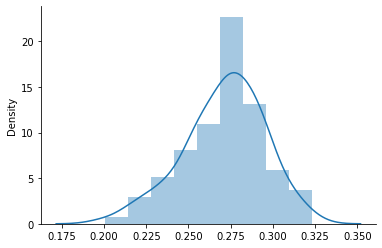

In [304]:
#Distribution of coefficient of determination
test_r_squared_df=pd.DataFrame(data=test_r_squared)
test_r_squared_df.rename(columns = {0:'coefficient of determination'}, inplace = True) 

sb.distplot(test_r_squared_df)
sb.despine()

In [305]:
#Check the statistical significance
sum_ranks, pval_w = wilcoxon(test_r_squared[:,0])
print(pval_w)

3.896559845095909e-18


/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


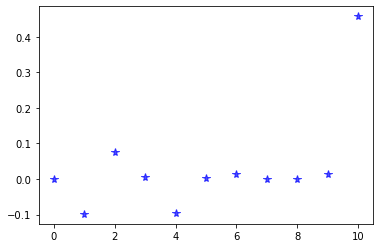

In [306]:
lasso_coef_df = pd.DataFrame(data=lasso_coef)

mean_coef=lasso_coef_df.mean()

plt.plot(mean_coef,alpha=0.7,linestyle='none',marker='*',markersize=8,color='blue') 

In [307]:
abs_mean_coef=abs(mean_coef)
top_coef=abs_mean_coef.sort_values(ascending=False)
top_coef.head()

10    0.458172
1     0.098281
4     0.095534
2     0.077018
9     0.014606
dtype: float64

In [322]:
## Regression
xx_dataset = pd.DataFrame({'Race1': xx_array[:, 0], 'Race2': xx_array[:, 1],
                          'Race3': xx_array[:, 2],
                          'Race4': xx_array[:, 3],
                          'Race5': xx_array[:, 4],
                          'Race6': xx_array[:, 5], 
                            'Age': xx_array[:, 6], 
                        'female': xx_array[:, 7], 
                         'tenure': xx_array[:, 8],
                         'pay': xx_array[:, 9],
                         'questions': xx_array[:, 10]})

In [350]:
happiness_dataset = pd.DataFrame({'happiness': happiness_y})
type(happiness_dataset)

pandas.core.frame.DataFrame

In [347]:
happiness_dataset = sc.fit_transform(happiness_dataset)  ## Scaling

In [339]:
top_coef=abs_mean_coef.sort_values(ascending=False)
top_coef

10    0.458172
1     0.098281
4     0.095534
2     0.077018
9     0.014606
6     0.012943
3     0.006483
5     0.002365
8     0.001291
7     0.000983
0     0.000000
dtype: float64

In [324]:
#Choose top 5 features.

#all features.
all_features = xx_dataset

features_number = 5
#get the top n features
top_coef=abs_mean_coef.sort_values(ascending=False)

selected_features = all_features.iloc[:,top_coef.index[0]]

for features in range(features_number-1):
    selected_features = pd.concat([selected_features, all_features.iloc[:,top_coef.index[features+1]]], axis = 1)


In [335]:

x_linear = selected_features
y_linear = happiness_dataset

train_number = 1000
#Run this part for 1000 times and get the values for r-squared, alpha, and the weights.
#reg.alpha_, reg.coef_, r2score.

#initialize
linear_r_squared = np.zeros((train_number,1))
linear_coef = np.zeros((train_number,x_linear.shape[1]))

for trialNo in range(train_number):
    
    #split 80-20
    Xl_train, Xl_test, Yl_train, Yl_test = train_test_split(x_linear, y_linear, test_size=0.2)
    

    linear_reg = linear_model.LinearRegression()
    linear_reg.fit(Xl_train,Yl_train)
    
    
    Ypredl = linear_reg.predict(Xl_test)
    
    linear_r_squared[trialNo] = r2_score(Yl_test, Ypredl)
    linear_coef[trialNo,:] = linear_reg.coef_

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


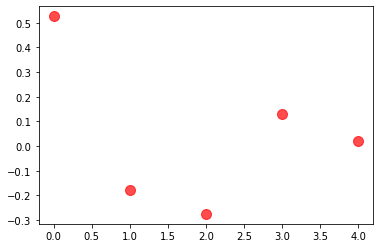

In [336]:
#Average weight of the coefficient for each feature
linear_coef_df = pd.DataFrame(data=linear_coef)

mean_linear_coef=linear_coef_df.mean()

plt.plot(mean_linear_coef,alpha=0.7,linestyle='none',marker='o',markersize=10,color='red') 

In [337]:
for i,v in enumerate(mean_linear_coef):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.52653
Feature: 1, Score: -0.17869
Feature: 2, Score: -0.27525
Feature: 3, Score: 0.12919
Feature: 4, Score: 0.02080


In [353]:
## Save and exit
xx_dataset.to_pickle("./xx.pkl")
happiness_dataset.to_pickle("./y.pkl")
x_man_quest.to_pickle("./x_quest19.pkl")